In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r"C:\Users\Roshen Hasangha\Desktop\dataset\final_multimodal_dataset.csv")
features = ['koi_steff', 'koi_slogg', 'koi_srad', 'koi_prad', 'koi_score', 'koi_period']

X = df[features].values
y = df['label'].values

# Scale
scaler_tab = StandardScaler()
X_scaled = scaler_tab.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
import tensorflow as tf

model_m1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_m1 = model_m1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)





Epoch 1/20


29/29 [==============================] - 2s 13ms/step - loss: 0.5932 - accuracy: 0.7971 - val_loss: 0.4100 - val_accuracy: 0.9912
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9656 - val_loss: 0.2106 - val_accuracy: 0.9867
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.9800 - val_loss: 0.0979 - val_accuracy: 0.9912
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9812 - val_loss: 0.0567 - val_accuracy: 0.9956
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.9823 - val_loss: 0.0408 - val_accuracy: 0.9912
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9867 - val_loss: 0.0336 - val_accuracy: 0.9912
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9889 - val_loss: 0.0336 - val_accuracy: 0.9912
Epoch 8/20
29/

9/9 [==============================] - 0s 718us/step - loss: 0.0475 - accuracy: 0.9788
Test Accuracy: 0.9788
9/9 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.95      0.98       124

    accuracy                           0.98       283
   macro avg       0.98      0.98      0.98       283
weighted avg       0.98      0.98      0.98       283



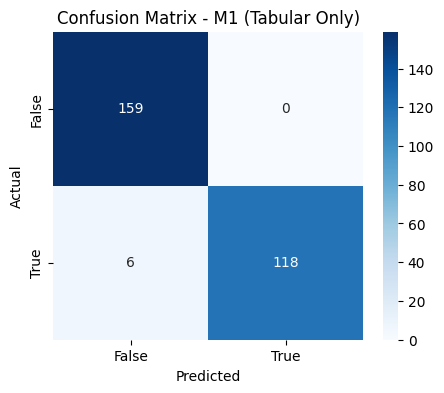

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation
loss, accuracy = model_m1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
y_pred = (model_m1.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - M1 (Tabular Only)")
plt.show()


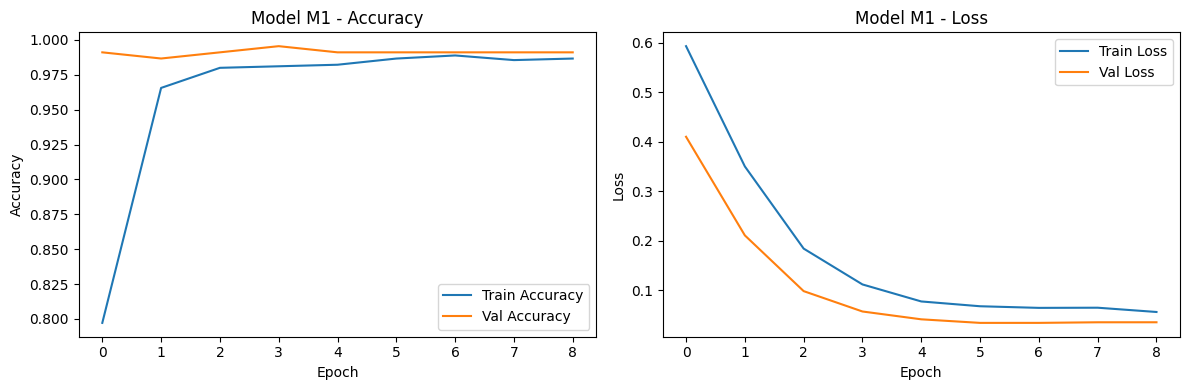

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_m1.history['accuracy'], label='Train Accuracy')
plt.plot(history_m1.history['val_accuracy'], label='Val Accuracy')
plt.title('Model M1 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_m1.history['loss'], label='Train Loss')
plt.plot(history_m1.history['val_loss'], label='Val Loss')
plt.title('Model M1 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
